# Table of Contents
 <p><div class="lev3 toc-item"><a href="#compare-model-to-data" data-toc-modified-id="compare-model-to-data-001"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>compare model to data</a></div>

In [1]:
import sys
sys.path.append("/Users/sebastian/work/git/stk/ml/waveforms/nonspin/")
from waveform import SingleModeNRWaveform
import network_utils as nu

Using TensorFlow backend.


In [2]:
import copy

In [3]:
import numpy as np

In [4]:
%matplotlib inline

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [6]:
# load data

nrfiles = [
    '/Users/sebastian/work/data/SXS_BBH_0071_Res5.h5', #q=1
    '/Users/sebastian/work/data/SXS_BBH_0169_Res5.h5', #q=2
    '/Users/sebastian/work/data/SXS_BBH_0168_Res5.h5', #q=3
    '/Users/sebastian/work/data/SXS_BBH_0167_Res5.h5' #q=4
]

# q1 = SingleModeNRWaveform(nrfiles[0], 2, 2, 1000)

ell = 2
mm = 2

npts_time = 1000
npts_mass_ratio = len(nrfiles)

# t1=None
# t2=None
t1=-600
t2=80

nrdata = [SingleModeNRWaveform(nrfile, ell, mm, npts_time,t1=t1,t2=t2) for nrfile in nrfiles]

In [7]:
x_train=nu.prepare_x_train_2d_data_for_neural_net(nrdata)

print(x_train)
print(x_train.shape)


[[-600.            0.99999999]
 [-599.31931932    0.99999999]
 [-598.63863864    0.99999999]
 ...
 [  78.63863864    3.9999874 ]
 [  79.31931932    3.9999874 ]
 [  80.            3.9999874 ]]
(4000, 2)


In [8]:
np.max(nrdata[0].phi)

-291.7156206368869

In [9]:
plt.plot(nrdata[0].phi)

In [10]:
def my_prepare_y_train_2d_data_for_neural_net(dim1_data, data_attribute, scaling_method, centre_method=None):
    y_train = None

    for i in range(len(dim1_data)):
        if scaling_method == 'eta-amp':
            scale = getattr(dim1_data[i], 'eta')
        elif scaling_method == 'eta-phase':
            scale = getattr(dim1_data[i], 'eta')**-1
        elif scaling_method == 'eta-phase-and-max-first':
            scale1 = np.max(getattr(dim1_data[0], data_attribute))
            scale2 = getattr(dim1_data[i], 'eta')**0
            scale3 = np.max(getattr(dim1_data[i], data_attribute))
            scale = scale1*scale2*scale3
        elif scaling_method == 'maximum_of_first':
            scale = -np.max(getattr(dim1_data[0], data_attribute))
        elif scaling_method == 'maximum_of_each':
            scale = np.max(getattr(dim1_data[i], data_attribute))
        elif scaling_method is None:
            scale = 1.

        if centre_method == 'subtract_last':
            centre = getattr(dim1_data[i], data_attribute)[-1]
        elif centre_method is None:
            centre = 0.

        print scale
            
        if y_train is None:
            y_data = copy.copy(getattr(dim1_data[i], data_attribute))
            y_data -= centre
#             y_data /= scale
#             scale = np.max(y_data)
            scale = getattr(dim1_data[i], 'eta')*600
            y_data /= scale
            y_train = y_data
        else:
            y_data = copy.copy(getattr(dim1_data[i], data_attribute))
            y_data -= centre
#             y_data /= scale
#             scale = np.max(y_data)
            scale = getattr(dim1_data[i], 'eta')*600
            y_data /= scale
            y_train = np.row_stack((y_train, y_data))

    y_train = y_train.reshape( dim1_data[0].npts * len(dim1_data) )

    return y_train

In [11]:
# scaling_method='eta'
# scaling_method='eta-amp'
# scaling_method='eta-phase-and-max-first'
# scaling_method='eta-phase'
# scaling_method='maximum_of_first'
# scaling_method='maximum_of_each'
scaling_method=None

In [12]:
centre_method='subtract_last'
# centre_method=None

In [13]:
#TODO: Need to make it easier to scale the data
#TODO: need to implement a centring of the data

# data_attribute='amp'
data_attribute='phi'

y_train=my_prepare_y_train_2d_data_for_neural_net(nrdata,
    data_attribute=data_attribute,
    scaling_method=scaling_method,
    centre_method=centre_method)

y_no_scale=my_prepare_y_train_2d_data_for_neural_net(nrdata,
    data_attribute=data_attribute,
    scaling_method=None,
    centre_method=None)

# y_train=nu.prepare_y_train_2d_data_for_neural_net(nrdata,
#     data_attribute=data_attribute,
#     scaling_method=scaling_method,
#     centre_method=centre_method)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [14]:
print(y_train)
print(y_train.shape)

[0.66859646 0.66830783 0.66801909 ... 0.00836304 0.00435567 0.        ]
(4000,)


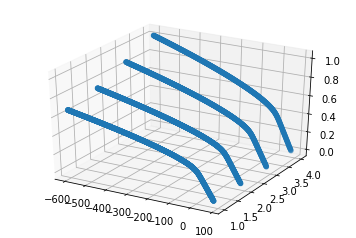

In [15]:
# plot the input data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train)
# ax.scatter(x_train[:,0], x_train[:,1], y_no_scale)
plt.show()

In [16]:
plt.figure()
plt.plot(nrdata[0].times, (nrdata[0].phi-nrdata[0].phi[-1])/nrdata[0].phi[0]*(1./0.35))
plt.plot(nrdata[1].times, (nrdata[1].phi-nrdata[1].phi[-1])/nrdata[0].phi[0]*(1./0.35))
plt.plot(nrdata[2].times, (nrdata[2].phi-nrdata[2].phi[-1])/nrdata[0].phi[0]*(1./0.35))
plt.plot(nrdata[3].times, (nrdata[3].phi-nrdata[3].phi[-1])/nrdata[0].phi[0]*(1./0.35))

In [17]:
(nrdata[0].phi-nrdata[0].phi[-1])[0]

100.28946842144995

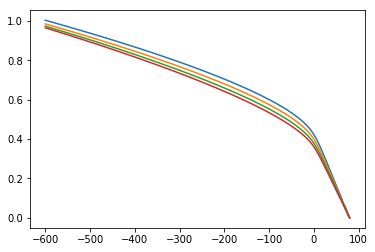

In [18]:
plt.figure()
plt.plot(nrdata[0].times, (nrdata[0].phi-nrdata[0].phi[-1])/100)
plt.plot(nrdata[1].times, (nrdata[1].phi-nrdata[1].phi[-1])/100)
plt.plot(nrdata[2].times, (nrdata[2].phi-nrdata[2].phi[-1])/100)
plt.plot(nrdata[3].times, (nrdata[3].phi-nrdata[3].phi[-1])/100)

In [19]:
1 = 0.35*A

SyntaxError: can't assign to literal (<ipython-input-19-82a3c9cf0196>, line 1)

In [20]:
1/0.35

2.857142857142857

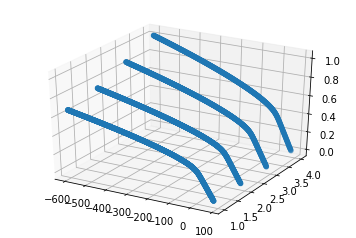

In [21]:
# plot the input data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train)
plt.show()

In [22]:
act='softplus'
# act='elu'
# act='relu'
model = nu.train_network(x_train, y_train, act, epochs=500)

Epoch 1/500
4000/4000 [==============================] - 0s 115us/step - loss: 0.0584
Epoch 2/500
4000/4000 [==============================] - 0s 46us/step - loss: 0.0145
Epoch 3/500
4000/4000 [==============================] - 0s 43us/step - loss: 0.0079
Epoch 4/500
4000/4000 [==============================] - 0s 38us/step - loss: 0.0073
Epoch 5/500
4000/4000 [==============================] - 0s 39us/step - loss: 0.0063
Epoch 6/500
4000/4000 [==============================] - 0s 42us/step - loss: 0.0029
Epoch 7/500
4000/4000 [==============================] - 0s 42us/step - loss: 5.9347e-04
Epoch 8/500
4000/4000 [==============================] - 0s 40us/step - loss: 5.2173e-04
Epoch 9/500
4000/4000 [==============================] - 0s 42us/step - loss: 4.2038e-04
Epoch 10/500
4000/4000 [==============================] - 0s 43us/step - loss: 4.7033e-04
Epoch 11/500
4000/4000 [==============================] - 0s 41us/step - loss: 5.9665e-04
Epoch 12/500
4000/4000 [==================

4000/4000 [==============================] - 0s 41us/step - loss: 2.0658e-04
Epoch 93/500
4000/4000 [==============================] - 0s 38us/step - loss: 2.0053e-04
Epoch 94/500
4000/4000 [==============================] - 0s 38us/step - loss: 2.3368e-04
Epoch 95/500
4000/4000 [==============================] - 0s 38us/step - loss: 2.1291e-04
Epoch 96/500
4000/4000 [==============================] - 0s 36us/step - loss: 1.8531e-04
Epoch 97/500
4000/4000 [==============================] - 0s 37us/step - loss: 1.7418e-04
Epoch 98/500
4000/4000 [==============================] - 0s 40us/step - loss: 1.9061e-04
Epoch 99/500
4000/4000 [==============================] - 0s 40us/step - loss: 1.9152e-04
Epoch 100/500
4000/4000 [==============================] - 0s 40us/step - loss: 1.7998e-04
Epoch 101/500
4000/4000 [==============================] - 0s 45us/step - loss: 2.1468e-04
Epoch 102/500
4000/4000 [==============================] - 0s 37us/step - loss: 2.3132e-04
Epoch 103/500
4000/4

4000/4000 [==============================] - 0s 57us/step - loss: 2.1383e-05
Epoch 183/500
4000/4000 [==============================] - 0s 59us/step - loss: 2.8769e-05
Epoch 184/500
4000/4000 [==============================] - 0s 56us/step - loss: 1.7874e-05
Epoch 185/500
4000/4000 [==============================] - 0s 57us/step - loss: 2.1276e-05
Epoch 186/500
4000/4000 [==============================] - 0s 60us/step - loss: 2.0746e-05
Epoch 187/500
4000/4000 [==============================] - 0s 60us/step - loss: 1.9362e-05
Epoch 188/500
4000/4000 [==============================] - 0s 60us/step - loss: 2.1319e-05
Epoch 189/500
4000/4000 [==============================] - 0s 43us/step - loss: 2.9007e-05
Epoch 190/500
4000/4000 [==============================] - 0s 36us/step - loss: 1.7541e-05
Epoch 191/500
4000/4000 [==============================] - 0s 36us/step - loss: 1.9824e-05
Epoch 192/500
4000/4000 [==============================] - 0s 41us/step - loss: 2.1299e-05
Epoch 193/500

4000/4000 [==============================] - 0s 59us/step - loss: 9.9350e-06
Epoch 273/500
4000/4000 [==============================] - 0s 61us/step - loss: 4.4258e-06
Epoch 274/500
4000/4000 [==============================] - 0s 66us/step - loss: 5.3640e-06
Epoch 275/500
4000/4000 [==============================] - 0s 57us/step - loss: 1.9447e-05
Epoch 276/500
4000/4000 [==============================] - 0s 57us/step - loss: 2.8858e-05
Epoch 277/500
4000/4000 [==============================] - 0s 39us/step - loss: 3.0376e-06
Epoch 278/500
4000/4000 [==============================] - 0s 37us/step - loss: 5.2703e-06
Epoch 279/500
4000/4000 [==============================] - 0s 38us/step - loss: 8.1014e-06
Epoch 280/500
4000/4000 [==============================] - 0s 37us/step - loss: 3.8499e-06
Epoch 281/500
4000/4000 [==============================] - 0s 38us/step - loss: 5.3746e-06
Epoch 282/500
4000/4000 [==============================] - 0s 50us/step - loss: 2.2007e-05
Epoch 283/500

4000/4000 [==============================] - 0s 35us/step - loss: 3.9800e-05
Epoch 362/500
4000/4000 [==============================] - 0s 39us/step - loss: 3.4010e-06
Epoch 363/500
4000/4000 [==============================] - 0s 36us/step - loss: 4.4451e-06
Epoch 364/500
4000/4000 [==============================] - 0s 37us/step - loss: 2.3237e-06
Epoch 365/500
4000/4000 [==============================] - 0s 37us/step - loss: 4.3341e-06
Epoch 366/500
4000/4000 [==============================] - 0s 37us/step - loss: 1.1888e-05
Epoch 367/500
4000/4000 [==============================] - 0s 40us/step - loss: 3.1568e-06
Epoch 368/500
4000/4000 [==============================] - 0s 38us/step - loss: 3.3498e-06
Epoch 369/500
4000/4000 [==============================] - 0s 55us/step - loss: 3.2220e-06
Epoch 370/500
4000/4000 [==============================] - 0s 57us/step - loss: 4.4421e-06
Epoch 371/500
4000/4000 [==============================] - 0s 53us/step - loss: 1.7367e-05
Epoch 372/500

Epoch 451/500
4000/4000 [==============================] - 0s 39us/step - loss: 9.3536e-06
Epoch 452/500
4000/4000 [==============================] - 0s 36us/step - loss: 7.1551e-06
Epoch 453/500
4000/4000 [==============================] - 0s 43us/step - loss: 1.9821e-06
Epoch 454/500
4000/4000 [==============================] - 0s 51us/step - loss: 5.3410e-06
Epoch 455/500
4000/4000 [==============================] - 0s 40us/step - loss: 7.2667e-06
Epoch 456/500
4000/4000 [==============================] - 0s 40us/step - loss: 2.7006e-06
Epoch 457/500
4000/4000 [==============================] - 0s 38us/step - loss: 8.2570e-06
Epoch 458/500
4000/4000 [==============================] - 0s 39us/step - loss: 2.1592e-06
Epoch 459/500
4000/4000 [==============================] - 0s 40us/step - loss: 2.0455e-06
Epoch 460/500
4000/4000 [==============================] - 0s 40us/step - loss: 2.0124e-06
Epoch 461/500
4000/4000 [==============================] - 0s 39us/step - loss: 3.4220e-06

### compare model to data

In [23]:
y_predict = model.predict(x_train)

In [24]:
# plot the input data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train, color='C0',s=20)
ax.scatter(x_train[:,0], x_train[:,1], y_predict, color='C1',s=3)
plt.show()

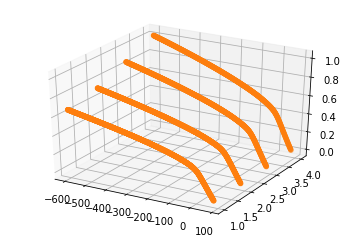

In [25]:
# plot the input data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train, color='C0',s=3)
ax.scatter(x_train[:,0], x_train[:,1], y_predict, color='C1',s=20)
plt.show()

In [26]:
x_train.shape

(4000, 2)

In [27]:
x_train[:,1]

array([0.99999999, 0.99999999, 0.99999999, ..., 3.9999874 , 3.9999874 ,
       3.9999874 ])

In [28]:
times = x_train[:npts_time,0]
qlist = x_train[:npts_time,1]

In [29]:
X = np.column_stack((times, qlist))

In [30]:
p1 = model.predict(X)

In [31]:
# nrdata = [SingleModeNRWaveform(nrfile, ell, mm, npts_time,t1=t1,t2=t2) for nrfile in nrfiles]

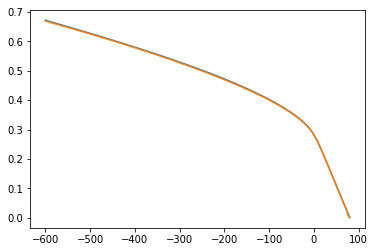

In [32]:
plt.figure()
plt.plot(times, p1)
# sc=(nrdata[0].phi-nrdata[0].phi[-1])[0]
sc=nrdata[0].eta*600
plt.plot(times, (nrdata[0].phi-nrdata[0].phi[-1])/sc)

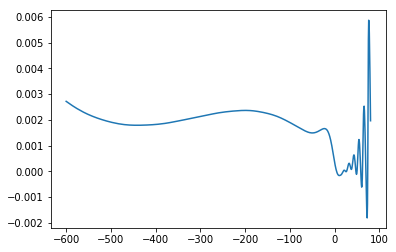

In [33]:
plt.figure()
# sc=(nrdata[0].phi-nrdata[0].phi[-1])[0]
sc=nrdata[0].eta*600
nrp1=(nrdata[0].phi-nrdata[0].phi[-1])/sc
plt.plot(times, p1[:,0]-nrp1)

In [39]:
def compare_model_to_data(idx, nrdata, model):
    
    times_points = len(nrdata[idx].times)
    
    q = nrdata[idx].q
    
    times = x_train[:times_points,0]
    qlist = np.zeros(len(times)) + q
    
    X = np.column_stack((times, qlist))
    
    p1 = model.predict(X)[:,0]

#     sc=(nrdata[idx].phi-nrdata[idx].phi[-1])[0]
    sc=nrdata[idx].eta*600
    nrpi=(nrdata[idx].phi-nrdata[idx].phi[-1])/sc
    
    max_diff = np.max(np.abs(nrpi-p1))
    mean_diff = np.mean(nrpi-p1)
    
    fig, axes = plt.subplots(1,2, figsize=(12,4))
    
    axes[0].plot(times, p1)
    axes[0].plot(times, nrpi)
    
    axes[1].plot(times, nrpi-p1)
    axes[1].axhline(-max_diff, color='k', ls='--')
    axes[1].axhline(max_diff, color='k', ls='--')
    axes[1].axhline(mean_diff, color='k', ls='-.')
    axes[1].set_title("max diff = {0:.4}".format(max_diff))

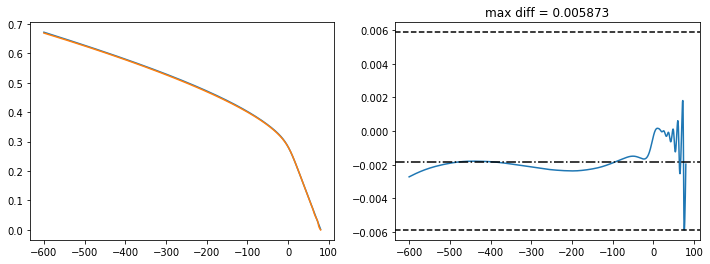

In [40]:
compare_model_to_data(0, nrdata, model)

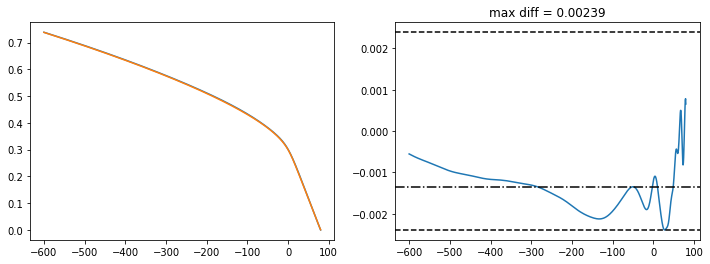

In [41]:
compare_model_to_data(1, nrdata, model)

In [42]:
compare_model_to_data(2, nrdata, model)

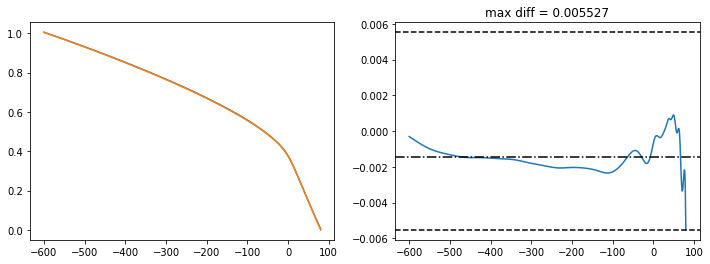

In [43]:
compare_model_to_data(3, nrdata, model)